# TSF Internship
# Name: Sarthak Wakchaure
# Task-4 : Prediction using Decision Tree Algorithm
# GRIP @ The Sparks Foundation

# Import required libraries

In [243]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pydot
from IPython.display import Image

In [244]:
#Read Dataset
dataset=pd.read_csv('iris_flower.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [245]:
dataset.shape

(150, 5)

In [246]:
dataset.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [247]:
dataset.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [248]:
dataset.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [249]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [250]:
x=dataset.drop(['species'],axis=1)
y=dataset['species']

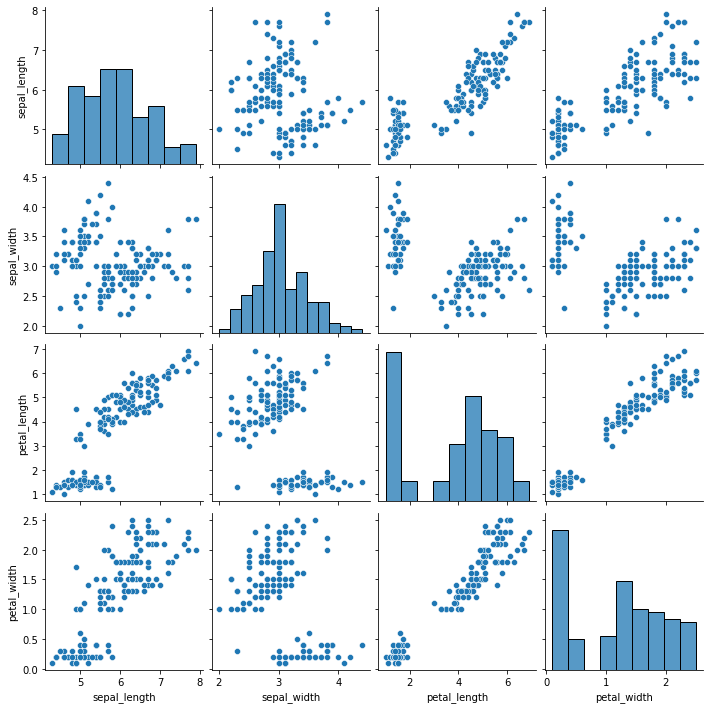

In [251]:
#Data visualization
sns.pairplot(dataset)

# Data preprocessing

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
encoder=LabelEncoder()

In [254]:
dataset['species']=encoder.fit_transform(dataset['species'])

In [255]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [256]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


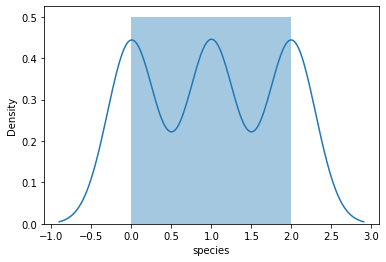

In [257]:
#distribution of species
sns.distplot(dataset['species'])

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [260]:
x_train.shape

(120, 4)

In [261]:
x_test.shape

(30, 4)

# Decision tree algorithm

In [262]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [263]:
dc=DecisionTreeClassifier(criterion='entropy')

In [264]:
#model training
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [265]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: species, dtype: object

In [266]:
y_pred=dc.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [267]:
vis=pd.DataFrame({'Actual': y_test , 'Predicted':y_pred})
vis

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


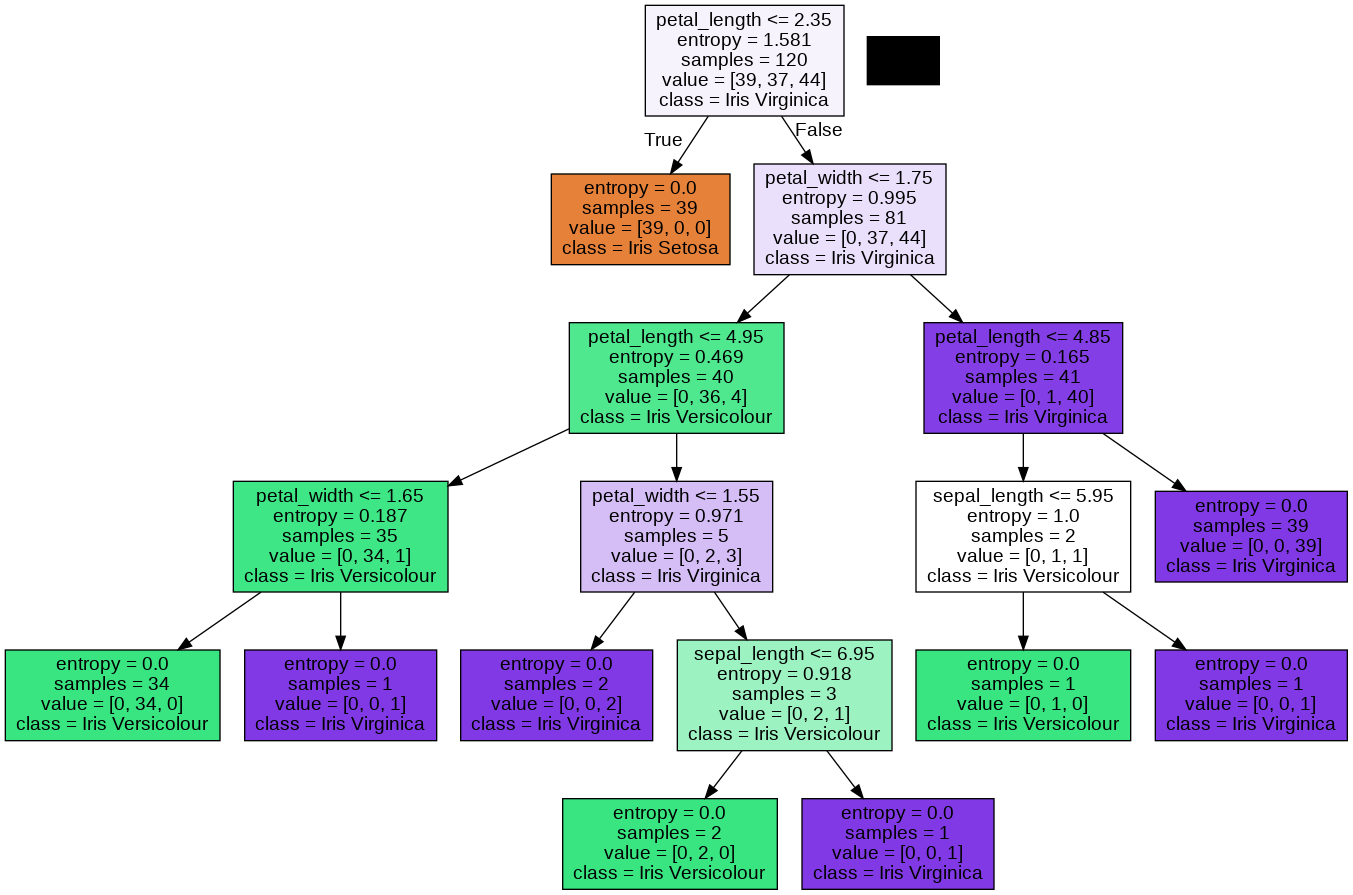

In [268]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

export_graphviz(
        dc,
        out_file="img\desision_tree.dot",
        feature_names=feature_names,
        class_names=class_names,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png') 

# Model Evaluation

In [269]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [270]:
res=confusion_matrix(y_test,y_pred)
res

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [271]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  1.0


The accuracy score of the model is 1, so the model is giving best results with 100% accuracy

In [272]:
print("classification Report",classification_report(y_test,y_pred))

classification Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Thank you !!!